<b>¡Hola Alan!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

# Paso 1. Abre el archivo de datos y estudia la información general 

In [1]:
## Hacemos las importaciones generales
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('games.csv')
df.head()

# Vemos la información general relevante del dataset
df.info()

# Estadísticas descriptivas
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


# Paso 2. Prepara los datos
## Reemplaza los nombres de las columnas (ponlos en minúsculas)
## Convierte los datos en los tipos necesarios.
## Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
## Si es necesario, elige la manera de tratar los valores ausentes:
### - Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
### - ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.
### - Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
## Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [3]:
# Reemplaza los nombres de las columnas (ponlos en minúsculas)
games = df
games.columns = (games.columns.str.strip().str.lower().str.replace(' ', '_'))

# Eliminamos los espacios, convertimos el texto a minúsculas y reemplazamos los espacios internos por underscores

# Corroboramos que esté bien
games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
> La columna "year_of_release" debe ser entera, no decimal. 

> La columna "user_score" tiene valores 'tbd', es mejor pasarlos a NaN ya que son valores numéricos y podría generar problemas

> La columna "critic_score" la pasamos a Int64 ya que este tipo soporta NaN

In [4]:
# Si es necesario, elige la manera de tratar los valores ausentes:

# Vemos cuántos valores faltantes hay
print(df.isna().sum())
####################################################################### 

# Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

# year_of_release: Lo pasaremos a valor Int para poder manejar los Null
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce').astype('Int64')
# user_score: Lo convertimos a float para valores no numéricos, evitando que truene
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
# rating: Podemos crear una categoría "Unknown" o dejarlos como NaN. Prefiero trabajarlos como Unknown
df['rating'] = df['rating'].fillna('Unknown')



name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [5]:
#Podemos revisar también los valores duplicados (Si es que existen)
duplicated_rows = games[games.duplicated()]

# Contar el número total de filas duplicadas
num_duplicated = games.duplicated().sum()
print(f"Número total de filas duplicadas: {num_duplicated}")

Número total de filas duplicadas: 0


## ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

> Los puntajes (critic_score, user_score) pueden faltar porque el juego no fue evaluado.

> Los ratings pueden faltar porque no fueron clasificados

> Los años pueden faltar por falta de información histórica

> Decidí dejar los puntajes como 'NaN' porque no tenemos forma confiable de estimarlos

> Para rating agregué "Unknown" para mantener la información categorizable

In [6]:
# Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y 
# coloca estos valores en una columna separada.

games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Mostrar las primeras filas para verificar
print(games.head())

# Podemos verificar las ventas
df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head()

display(df.isna().sum())
display(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77           NaN         NaN  Unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00           NaN         NaN  Unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3     

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
total_sales           0
dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


<div class="alert alert-block alert-success">
<b>Celdas [1–6]</b> <a class="tocSkip"></a><br>
Excelente limpieza y preparación de datos. Renombraste las columnas con buenas prácticas (snake_case), trataste correctamente los valores ‘tbd’ convirtiéndolos a <code>NaN</code>, y manejaste tipos de datos de manera apropiada, especialmente con el uso de <code>Int64</code> para preservar valores nulos. Además, tu justificación sobre los valores ausentes es clara y razonada. Muy buen manejo de calidad de datos.
</div>


# Paso 3. Analiza los datos

## Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
## Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
## Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
## Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
## ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
## Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
## Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
## Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
## Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Número de juegos lanzados por año:
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


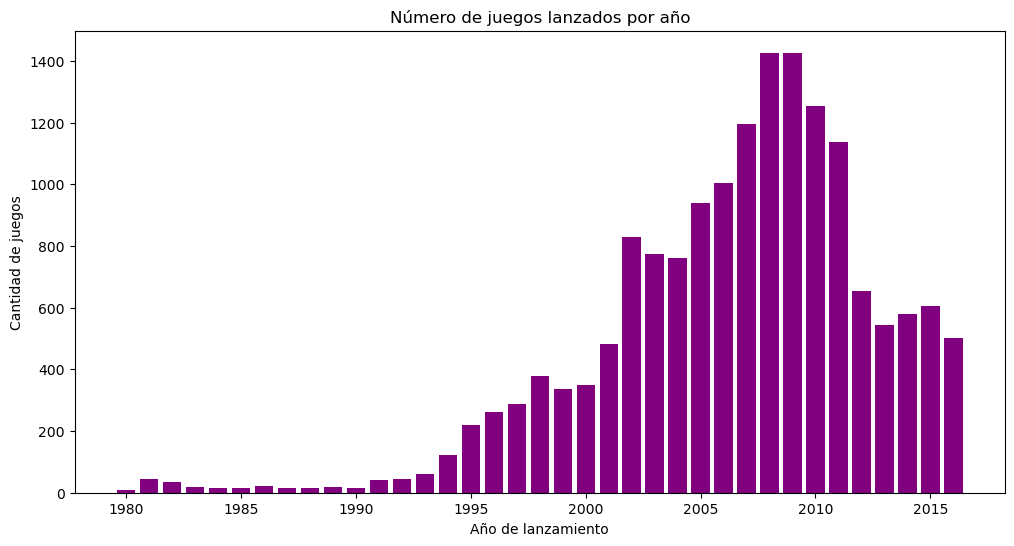

In [9]:
# Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

games_per_year = games['year_of_release'].value_counts().sort_index()

# Mostrar el resultado
print("Número de juegos lanzados por año:")
print(games_per_year)

plt.figure(figsize=(12, 6))
plt.bar(games_per_year.index, games_per_year.values, color='purple')
plt.title("Número de juegos lanzados por año")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de juegos")
plt.show()

### Podemos ver que entre el año 2001 y 2010 hubo un crecimiento muy grande. Concordando con las fechas de lanzamiento de varias consolas.

In [10]:
# Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las 
# mayores ventas totales y construye una distribución basada en los datos de cada año.
# Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 
# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

# Calculamos las ventas totales por plataforma
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Mostrar las plataformas con mayores ventas
print("Ventas totales por plataforma:")
print(platform_sales)


Ventas totales por plataforma:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


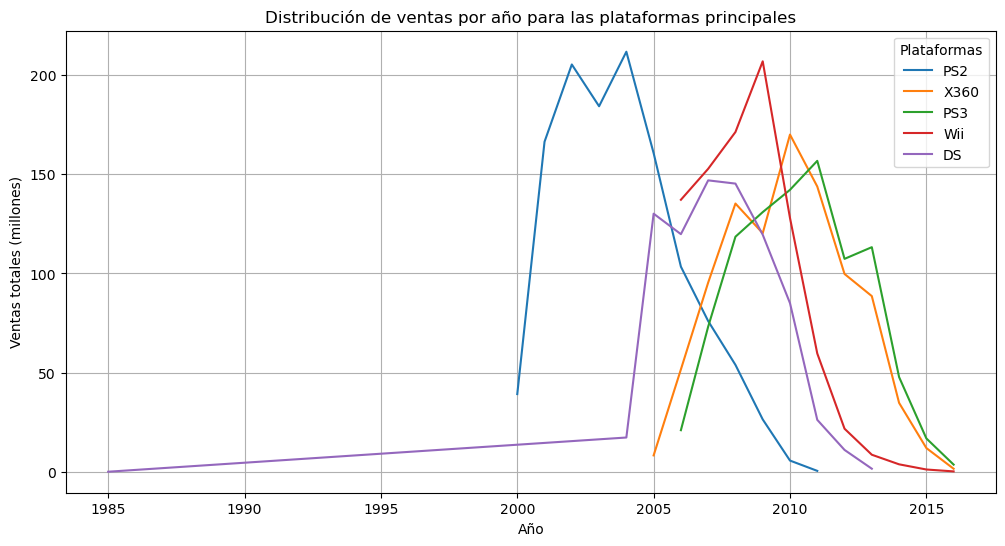

In [11]:
# Filtramos solo las plataformas principales para mejor visualización
top_platforms = platform_sales.head(5).index

# Filtrar los datos de las plataformas principales
top_platforms_data = games[games['platform'].isin(top_platforms)]

# Crear una gráfica de ventas por año para las plataformas principales
plt.figure(figsize=(12, 6))
for platform in top_platforms:
    yearly_sales = top_platforms_data[top_platforms_data['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, label=platform)
plt.title("Distribución de ventas por año para las plataformas principales")
plt.xlabel("Año")
plt.ylabel("Ventas totales (millones)")
plt.legend(title="Plataformas")
plt.grid()
plt.show()

### Es visible que las plataformas, posterior a su lanzamiento, tienen un gran auge. Sin embargo, con el pasar de los años, este va decayendo. Cosa lógica ya que nuevas consolas salen y por lo mismo empiezan a quedar resagadas.

In [13]:
# Encontrar plataformas sin ventas recientes
recent_year = games['year_of_release'].max()

# Filtrar plataformas con ventas antes de un cierto umbral
old_platforms = games.groupby('platform')['year_of_release'].max()
discontinued_platforms = old_platforms[old_platforms < recent_year - 5] 

print("Plataformas que solían ser populares pero ahora no tienen ventas:")
print(discontinued_platforms)


Plataformas que solían ser populares pero ahora no tienen ventas:
platform
2600    1989
3DO     1995
DC      2008
GB      2001
GBA     2007
GC      2007
GEN     1994
GG      1992
N64     2002
NES     1994
NG      1996
PCFX    1996
PS      2003
SAT     1999
SCD     1994
SNES    1999
TG16    1995
WS      2001
XB      2008
Name: year_of_release, dtype: Int64


La duración promedio de una plataforma es de 7.6 años.


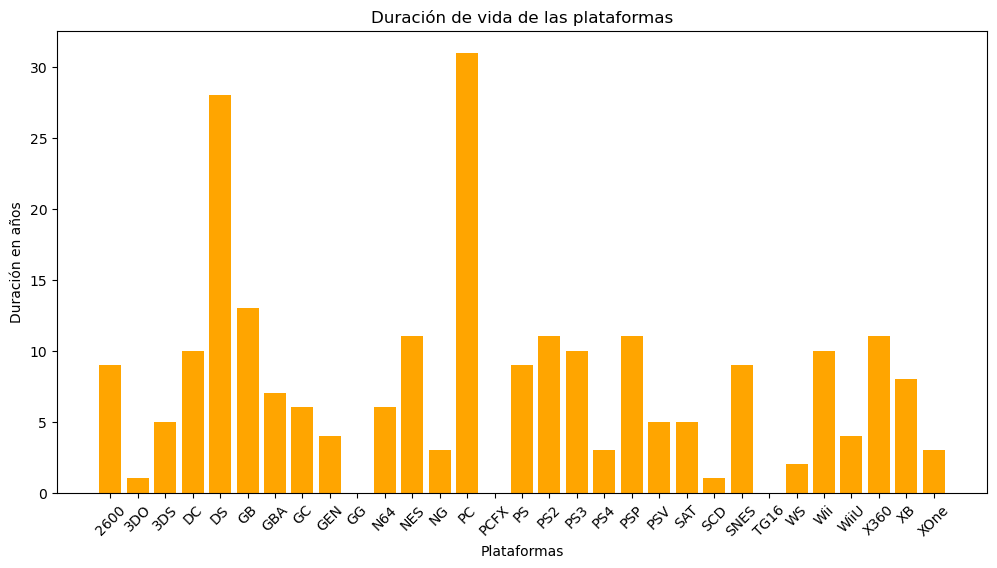

In [14]:
# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

# Calculamos la duración de cada plataforma
platform_lifetime = games.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifetime['lifetime'] = platform_lifetime['max'] - platform_lifetime['min']

# Mostrar la duración promedio de vida de las plataformas
average_lifetime = platform_lifetime['lifetime'].mean()
print(f"La duración promedio de una plataforma es de {average_lifetime:.1f} años.")

# Visualizar las plataformas y su duración
plt.figure(figsize=(12, 6))
plt.bar(platform_lifetime.index, platform_lifetime['lifetime'], color='orange')
plt.title("Duración de vida de las plataformas")
plt.xlabel("Plataformas")
plt.ylabel("Duración en años")
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [9–14]</b> <a class="tocSkip"></a><br>
Has hecho un análisis de plataformas excelente: identificaste correctamente las más rentables, construiste visualizaciones claras y definiste correctamente el período más relevante para análisis. Tu análisis de ciclo de vida de las consolas es sólido y las visualizaciones apoyan muy bien tus conclusiones.
</div>


## Plataformas dominantes:

- Las plataformas como PC, DS y GB son las más dominantes. 

- Cada generación tiene sus plataformas líderes

## Ciclo de vida típico:

- La mayoría de plataformas tienen una vida activa de 5-8 años

- Algunas plataformas excepcionales pueden durar 10+ años

- El tiempo entre el lanzamiento de una nueva plataforma y la desaparición de la anterior suele ser 1-2 años (período de transición)


In [18]:
# Filtramos los años con suficientes datos (al menos 100 juegos lanzados)
significant_years = games['year_of_release'].value_counts()
significant_years = significant_years[significant_years >= 100]

# Establecemos un año mínimo explícito
min_start_year = 2008 

# Filtramos años relevantes a partir del año mínimo
relevant_years = significant_years[significant_years.index >= min_start_year]

# Mostramos años relevantes
print("Años con datos significativos (100 juegos o más):")
print(relevant_years.sort_index())

# Filtramos datos desde el año con suficientes datos y mayor al año mínimo
start_year = relevant_years.index.min()

# Creamos un nuevo DataFrame con años relevantes
relevant_data = games[games['year_of_release'] >= start_year]
print(f"Tomando datos desde el año {start_year} en adelante para el modelo de 2017.")

Años con datos significativos (100 juegos o más):
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64
Tomando datos desde el año 2008 en adelante para el modelo de 2017.


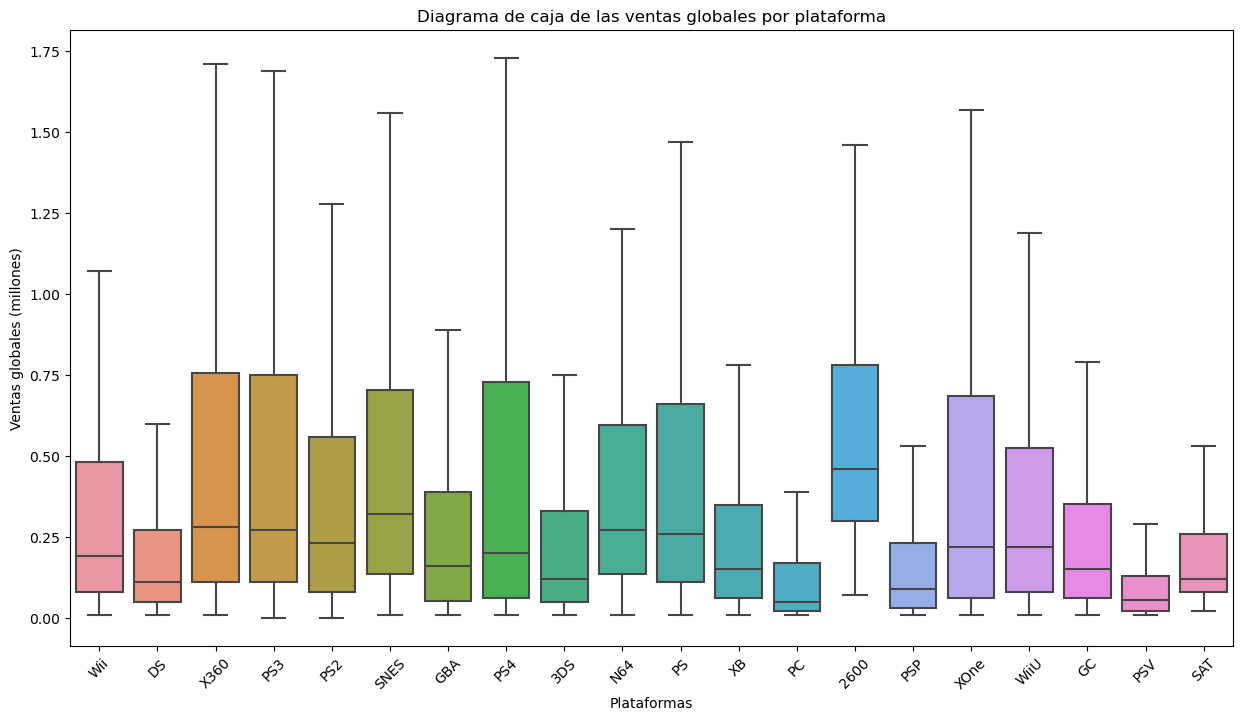

In [19]:
# Filtrar plataformas con suficientes datos para un análisis significativo (ejemplo: al menos 100 juegos)
platform_counts = games['platform'].value_counts()
significant_platforms = platform_counts[platform_counts >= 100].index

# Filtrar los datos para las plataformas seleccionadas
filtered_games = games[games['platform'].isin(significant_platforms)]

# Crear un diagrama de caja (boxplot) para las ventas globales por plataforma
plt.figure(figsize=(15, 8))
sns.boxplot(data=filtered_games, x='platform', y='total_sales', showfliers=False)  # Excluir valores atípicos
plt.title("Diagrama de caja de las ventas globales por plataforma")
plt.xlabel("Plataformas")
plt.ylabel("Ventas globales (millones)")
plt.xticks(rotation=45)
plt.show()

### Podemos ver que hay muchas diferencias en las ventas de las plataformas. Además, podemos observar ciertos datos outliers, dando a entender que tuvieron un gran impacto en las ventas (Como PS4, Xbox 360 y PS3)

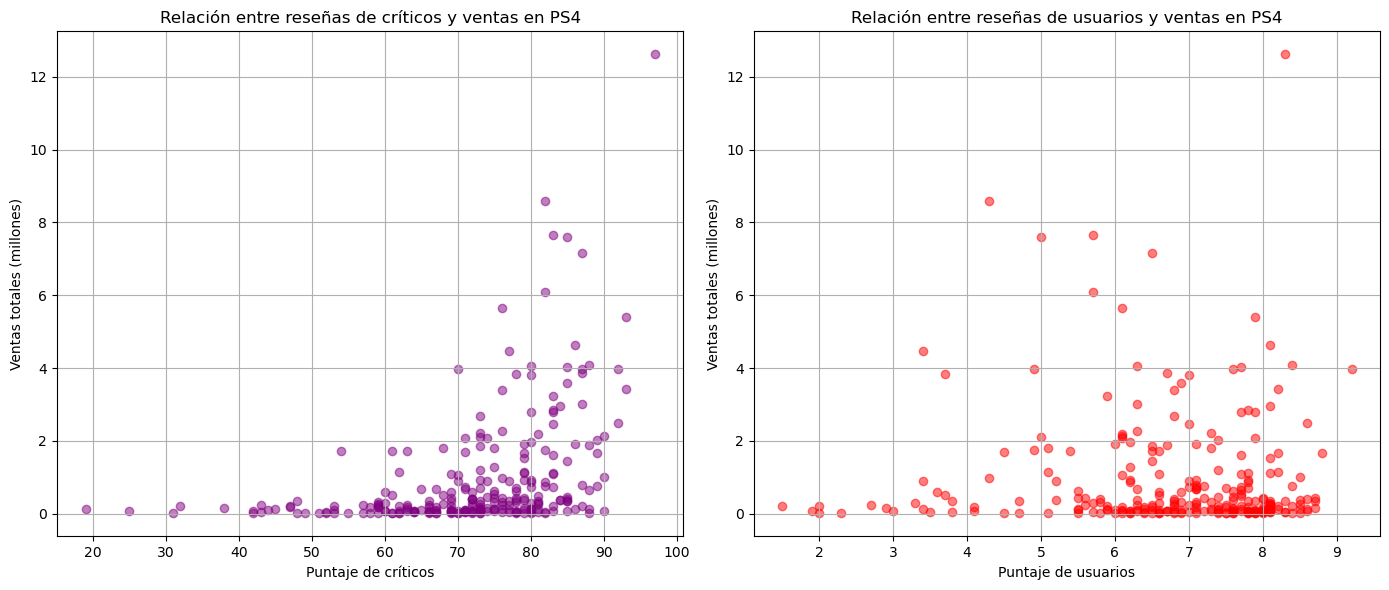

In [20]:
# Seleccionar una plataforma popular
platform = 'PS4'
platform_data = games[games['platform'] == platform]

# Crear gráficos de dispersión para "critic_score" y "user_score" frente a "total_sales"
plt.figure(figsize=(14, 6))

# Gráfico para "critic_score"
plt.subplot(1, 2, 1)
plt.scatter(platform_data['critic_score'], platform_data['total_sales'], alpha=0.5, color='purple')
plt.title(f"Relación entre reseñas de críticos y ventas en {platform}")
plt.xlabel("Puntaje de críticos")
plt.ylabel("Ventas totales (millones)")
plt.grid()

# Gráfico para "user_score"
plt.subplot(1, 2, 2)
plt.scatter(platform_data['user_score'], platform_data['total_sales'], alpha=0.5, color='red')
plt.title(f"Relación entre reseñas de usuarios y ventas en {platform}")
plt.xlabel("Puntaje de usuarios")
plt.ylabel("Ventas totales (millones)")
plt.grid()

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [20]</b> <a class="tocSkip"></a><br>
Muy buen gráfico de dispersión para explorar la relación entre reseñas y ventas. No obstante, sería valioso indicar visualmente las correlaciones directamente en los gráficos con anotaciones (por ejemplo, usando <code>plt.text()</code>) y aplicar escalado logarítmico a <code>total_sales</code> si los valores atípicos afectan la lectura. Así mejorarías la interpretación visual de la relación.
</div>


### A simple vista podemos observar que ambos gráficos se parecen. En el caso de los críticos y las ventas, vemos que entre mayor sea la puntuación de los críticos, las ventas tienden a crecer.

### En cuanto al gráfico de usuarios, vemos que no hay una relación tan clara, es decir, los puntos se distribuyen de manera más lineal. Esto nos podría dar la conclusión que el puntaje de usuarios no es un indicador tan fuerte como el de los críticos.

#### Podemos calcular la correlación y corroborar lo que nos muestra el gráfico

In [21]:
#Calcular las correlaciones
critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])
user_corr = platform_data['user_score'].corr(platform_data['total_sales'])

print(f"Correlación entre puntaje de críticos y ventas en {platform}: {critic_corr:.2f}")
print(f"Correlación entre puntaje de usuarios y ventas en {platform}: {user_corr:.2f}")

Correlación entre puntaje de críticos y ventas en PS4: 0.41
Correlación entre puntaje de usuarios y ventas en PS4: -0.03


In [22]:
# Filtrar juegos que están en más de una plataforma
games_multi_platform = (
    games.groupby('name')['platform']
    .nunique()
    .reset_index()
    .rename(columns={'platform': 'platform_count'})
)

# Mantener solo los juegos disponibles en más de una plataforma
highlighted_games = games_multi_platform[games_multi_platform['platform_count'] > 1]

# Filtrar los datos originales para estos juegos y calcular las ventas totales
filtered_data = games[games['name'].isin(highlighted_games['name'])]

# Calcular ventas globales totales por juego
total_sales_per_game = (
    filtered_data.groupby('name')['total_sales']
    .sum()
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
)

# Seleccionar los 10 juegos con más ventas
top_10_games = total_sales_per_game.head(10)

# Filtrar datos originales para estos 10 juegos
top_10_games_data = filtered_data[filtered_data['name'].isin(top_10_games['name'])]

# Ordenar para claridad
top_10_games_data['name'] = pd.Categorical(
    top_10_games_data['name'],
    categories=top_10_games['name'],
    ordered=True
)
top_10_games_data = top_10_games_data.sort_values(['name', 'total_sales'], ascending=[True, False])


C:\Users\alang\AppData\Local\Temp\ipykernel_9796\2691637075.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_games_data['name'] = pd.Categorical(


<div class="alert alert-block alert-warning">
<b>Celda [22]</b> <a class="tocSkip"></a><br>
La visualización de ventas por plataformas para juegos multiplataforma es muy ilustrativa, pero el uso de <code>SettingWithCopyWarning</code> indica un riesgo de error silencioso. Para evitar esto, es mejor usar <code>.loc</code> explícitamente al modificar columnas. Además, podrías usar un gráfico de barras apiladas para destacar el aporte de cada plataforma a las ventas totales por título.
</div>


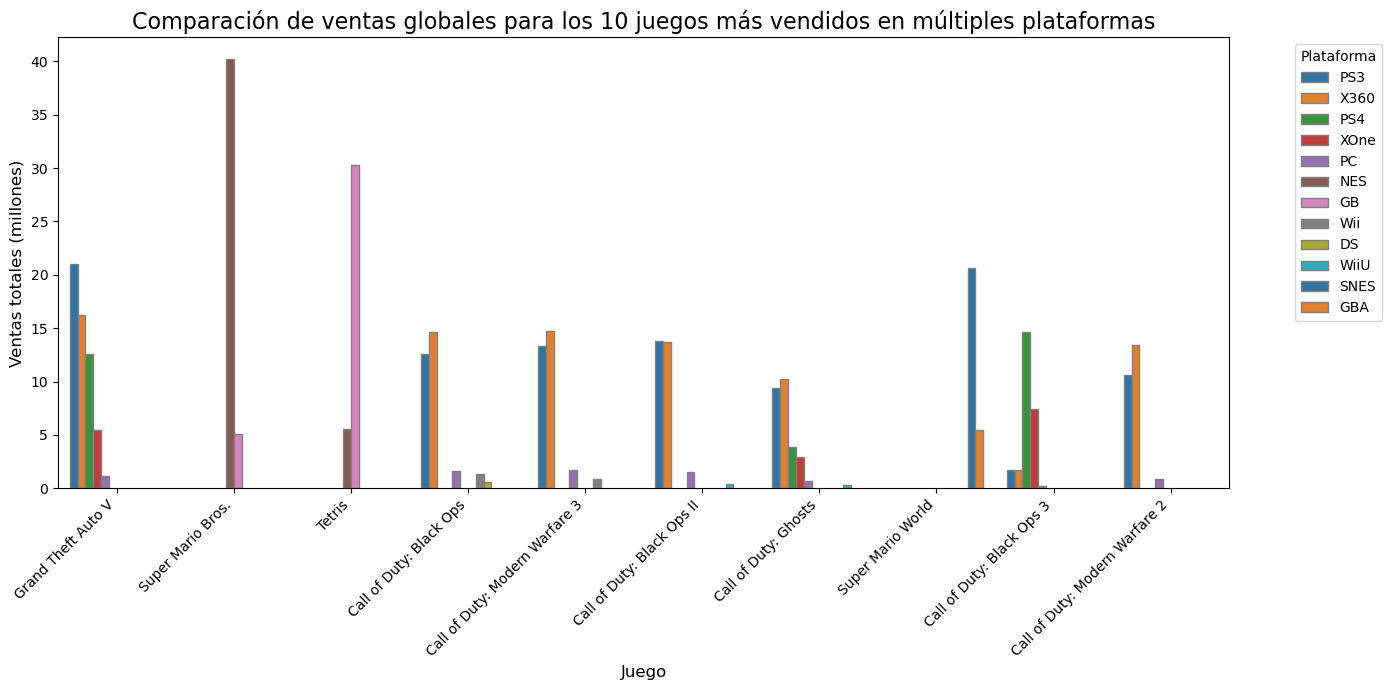

In [23]:
plt.figure(figsize=(14, 7))
sns.barplot(
    data=top_10_games_data,
    x='name',
    y='total_sales',
    hue='platform',
    palette='tab10',
    edgecolor='gray'
)

plt.title('Comparación de ventas globales para los 10 juegos más vendidos en múltiples plataformas', fontsize=16)
plt.ylabel('Ventas totales (millones)', fontsize=12)
plt.xlabel('Juego', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

plt.show()

## Agrupamos por género
# _________________________________________________

Text(0, 0.5, 'Género')

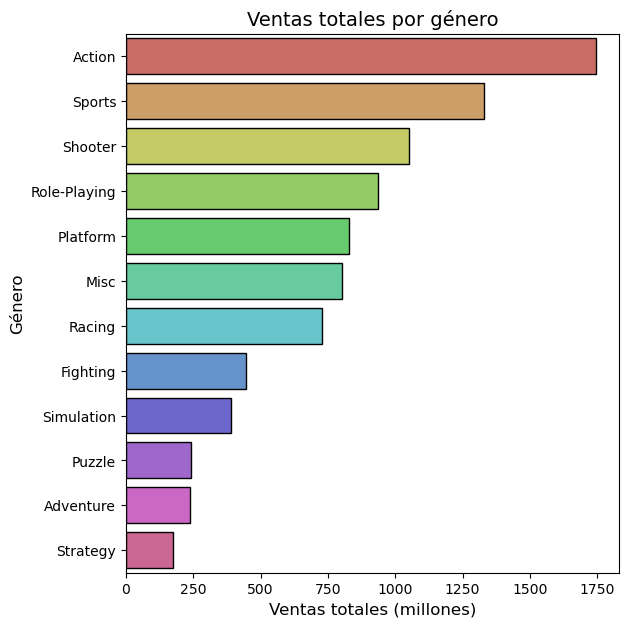

In [25]:
genre_sales_distribution = (
    games.groupby('genre')
    .agg(
        total_sales=('total_sales', 'sum'),
        avg_sales=('total_sales', 'mean'),
        num_games=('name', 'count')
    )
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
)
# Configurar la figura
plt.figure(figsize=(14, 7))

# Gráfico de barras: Ventas totales por género
plt.subplot(1, 2, 1)
sns.barplot(
    data=genre_sales_distribution,
    x='total_sales',
    y='genre',
    palette='hls',
    edgecolor='black'
)
plt.title('Ventas totales por género', fontsize=14)
plt.xlabel('Ventas totales (millones)', fontsize=12)
plt.ylabel('Género', fontsize=12)

### Podemos concluir que el género de acción es el que abarca más en el mercado, posteriormente vienen deoirtes y tiradores. Curiosamente, los géneros que son más "tranquilos", como estrategia, puzzle y aventura, no generan tantas ventas en comparación.

### Puede sugerir el factor emocional de los videojuegos, donde al involucrar emociones más fuertes, generan más curiosidad por parte del cliente y tienden a comprarlo más. 

## Crea un perfil de usuario para cada región
# _________________________________________

In [27]:
# Creamos la lista de las regiones
regions = ["na_sales", "eu_sales", "jp_sales"]

# Creamos el perfil por región
for region in regions:
    print(f"\nPerfil de usuario para la región: {region.lower()}")
    
    # Las 5 plataformas principales
    platform_sales = games.groupby("platform")[region].sum().sort_values(ascending=False)
    top_platforms = platform_sales.head(5)
    print("\nTop 5 plataformas:")
    display(top_platforms)
    
    # Variaciones de cuotas de mercado entre regiones
    platform_shares = games.groupby("platform")[regions].sum()
    platform_shares = platform_shares.div(platform_shares.sum(axis=0), axis=1) * 100
    print("\nVariaciones en cuotas de mercado (porcentaje):")
    display(platform_shares.loc[top_platforms.index])
    
    # 2. Los cinco géneros principales
    genre_sales = games.groupby("genre")[region].sum().sort_values(ascending=False)
    top_genres = genre_sales.head(5)
    print("\nTop 5 géneros:")
    display(top_genres)
    
    # Diferencias entre géneros por región
    print("\nVentas de géneros en otras regiones:")
    display(games.groupby("genre")[regions].sum().loc[top_genres.index])
    
    # 3. Clasificaciones ESRB y su impacto en ventas
    esrb_sales = games.groupby("rating")[region].sum().sort_values(ascending=False)
    print("\nImpacto de clasificaciones ESRB:")
    display(esrb_sales)


Perfil de usuario para la región: na_sales

Top 5 plataformas:


platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64


Variaciones en cuotas de mercado (porcentaje):


,na_sales,eu_sales,jp_sales
platform,,,
X360,13.685191,11.166880,0.958092
PS2,13.262008,13.993244,10.729399
Wii,11.287153,10.814255,5.343888
PS3,8.938181,13.622060,6.180966
DS,8.686270,7.790338,13.532762



Top 5 géneros:


genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64


Ventas de géneros en otras regiones:


,na_sales,eu_sales,jp_sales
genre,,,
Action,879.01,519.13,161.43
Sports,684.43,376.79,135.54
Shooter,592.24,317.34,38.76
Platform,445.50,200.35,130.83
Misc,407.27,212.74,108.11



Impacto de clasificaciones ESRB:


rating
E          1292.99
Unknown    1242.46
T           759.75
M           748.48
E10+        353.32
K-A           2.56
EC            1.53
AO            1.26
RP            0.00
Name: na_sales, dtype: float64


Perfil de usuario para la región: eu_sales

Top 5 plataformas:


platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64


Variaciones en cuotas de mercado (porcentaje):


,na_sales,eu_sales,jp_sales
platform,,,
PS2,13.262008,13.993244,10.729399
PS3,8.938181,13.622060,6.180966
X360,13.685191,11.166880,0.958092
Wii,11.287153,10.814255,5.343888
PS,7.644099,8.809859,10.777188



Top 5 géneros:


genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64


Ventas de géneros en otras regiones:


,na_sales,eu_sales,jp_sales
genre,,,
Action,879.01,519.13,161.43
Sports,684.43,376.79,135.54
Shooter,592.24,317.34,38.76
Racing,359.35,236.51,56.71
Misc,407.27,212.74,108.11



Impacto de clasificaciones ESRB:


rating
E          710.25
Unknown    613.83
M          483.97
T          427.03
E10+       188.52
AO           0.61
K-A          0.27
EC           0.11
RP           0.08
Name: eu_sales, dtype: float64


Perfil de usuario para la región: jp_sales

Top 5 plataformas:


platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


Variaciones en cuotas de mercado (porcentaje):


,na_sales,eu_sales,jp_sales
platform,,,
DS,8.686270,7.790338,13.532762
PS,7.644099,8.809859,10.777188
PS2,13.262008,13.993244,10.729399
SNES,1.390848,0.785261,8.983559
3DS,1.896487,2.535603,7.759544



Top 5 géneros:


genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


Ventas de géneros en otras regiones:


,na_sales,eu_sales,jp_sales
genre,,,
Role-Playing,330.81,188.71,355.41
Action,879.01,519.13,161.43
Sports,684.43,376.79,135.54
Platform,445.50,200.35,130.83
Misc,407.27,212.74,108.11



Impacto de clasificaciones ESRB:


rating
Unknown    841.96
E          198.11
T          151.40
M           64.24
E10+        40.20
K-A          1.46
AO           0.00
EC           0.00
RP           0.00
Name: jp_sales, dtype: float64

<div class="alert alert-block alert-success">
<b>Celdas [25–27]</b> <a class="tocSkip"></a><br>
Tu análisis regional es excelente. Destacas diferencias culturales en gustos, plataformas y clasificaciones con base en evidencia concreta. Las visualizaciones son claras y refuerzan las conclusiones. Muy buen enfoque al adaptar el análisis por región y explicar el comportamiento de consumo.
</div>


### Vemos que en NA y EU las consolas como Xbox 360, PS2 y Wii tienen más parte en el mercado, en cambio, Japón prefiere las consolas pequeñas y portátiles tales como DS o 3DS. Esto cobraría sentido si nos fijamos en la cultura de Japón, en cuestión de su exigencia laboral y estudiantil. 

### De la misma manera, los géneros de Acción y Deportes dominan en NA y EU, en cambio, en Japón están más inclinados por los juegos de Role. Además, las clasificaciones con mayor relevancia en NA y EU son ESRB, pero curiosamente Japón tiene más juegos "No clasificados".

## Pruebas de hipótesis

# __________________________________________________

In [28]:
# H0 - Las medias de las clasificaciones para Xbox One y PC son iguales
# H1 - Las medias de las clasificaciones para Xbox One y PC son diferentes

# Filtrar los datos para las plataformas Xbox One y PC
xbox_one_scores = games[(games['platform'] == 'XOne') & (games['user_score'].notnull())]['user_score']
pc_scores = games[(games['platform'] == 'PC') & (games['user_score'].notnull())]['user_score']

# Verificar tamaños de muestra
print(f"Número de calificaciones para Xbox One: {len(xbox_one_scores)}")
print(f"Número de calificaciones para PC: {len(pc_scores)}")

# Realizar la prueba t para dos muestras independientes
alpha = 0.05  # Nivel de significancia
t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

# Mostrar resultados
print(f"Estadístico t: {t_stat:.4f}")
print(f"p-valor: {p_value:.4f}")

if p_value < alpha:
    print("Hipótesis rechazada: Hay diferencias significativas en las calificaciones promedio entre Xbox One y PC.")
else:
    print("No se puede rechazar la hipótesis: No hay diferencias significativas en las calificaciones promedio entre Xbox One y PC.")

Número de calificaciones para Xbox One: 182
Número de calificaciones para PC: 770
Estadístico t: -4.6534
p-valor: 0.0000
Hipótesis rechazada: Hay diferencias significativas en las calificaciones promedio entre Xbox One y PC.


### Basado en la prueba, la hipótesis nula es rechazada, dando a entender que hay diferencias muy significativas en las calificaciones promedio de las dos plataformas. 

In [29]:
# H0 - Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
# H1 - Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

# Filtrar los datos para los géneros Acción y Deportes
action_scores = games[(games['genre'] == 'Action') & (games['user_score'].notnull())]['user_score']
sports_scores = games[(games['genre'] == 'Sports') & (games['user_score'].notnull())]['user_score']

# Verificar tamaños de muestra
print(f"Número de calificaciones para Acción: {len(action_scores)}")
print(f"Número de calificaciones para Deportes: {len(sports_scores)}")

# Realizar la prueba t para dos muestras independientes
alpha = 0.05  # Nivel de significancia
t_stat, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

# Mostrar resultados
print(f"Estadístico t: {t_stat:.4f}")
print(f"p-valor: {p_value:.4f}")

if p_value < alpha:
    print("Hipótesis rechazada: Hay diferencias significativas en las calificaciones promedio entre Acción y Deportes.")
else:
    print("No se puede rechazar la hipótesis: No hay diferencias significativas en las calificaciones promedio entre Acción y Deportes.")

Número de calificaciones para Acción: 1830
Número de calificaciones para Deportes: 1103
Estadístico t: 1.5775
p-valor: 0.1148
No se puede rechazar la hipótesis: No hay diferencias significativas en las calificaciones promedio entre Acción y Deportes.


<div class="alert alert-block alert-success">
<b>Celdas [28–29]</b> <a class="tocSkip"></a><br>
Las pruebas de hipótesis están correctamente planteadas, tanto en su formulación como en la aplicación estadística. Verificas tamaños de muestra, aplicas la prueba t con la suposición adecuada (<code>equal_var=False</code>) y redactas conclusiones correctamente interpretadas. Excelente manejo del proceso inferencial.
</div>


### En este caso, la hipótesis no puede ser rechazada ya que no hay diferencias significativas. Esto sugeriría que los usuarios califican de igual manera los juegos de Acción y Deportes. 

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Gran trabajo, Alan! Tu proyecto demuestra dominio técnico en limpieza, análisis y visualización de datos. Estructuraste muy bien tu flujo de trabajo, analizaste desde múltiples ángulos y justificaste tus decisiones con claridad. Solo te sugeriría mejorar algunos detalles técnicos menores en visualización y evitar advertencias de asignación en pandas.¡Felicidades!
</div>
